In [1]:
#import dependancies
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import scipy.stats as st

In [2]:
#read in data
data = pd.read_csv('/Users/kscomputer/Desktop/Project_1/Project_1/output_data/oxford_clean3.csv')
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#narrow down data to just mandataes
info = pd.DataFrame(data, columns= ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing",
                                         "C6_Stay_home_requirements", "E1_Income_support",
                                    "H6_Facial_coverings"])

In [4]:
info.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0


In [5]:
info = info.astype({'C1_School_closing': 'int', 'C2_Workplace_closing': 'int', 
                    'C6_Stay_home_requirements': 'int', 'E1_Income_support':'int',
                            'H6_Facial_coverings': 'int'}) 

In [6]:
info['Date'] = pd.to_datetime(info['Date'], format='%Y%m%d')
info.dropna()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,H6_Facial_coverings
0,Brazil,2020-01-01,0,0,0,0,0
1,Brazil,2020-01-02,0,0,0,0,0
2,Brazil,2020-01-03,0,0,0,0,0
3,Brazil,2020-01-04,0,0,0,0,0
4,Brazil,2020-01-05,0,0,0,0,0
...,...,...,...,...,...,...,...
2405,United States,2020-10-21,3,2,2,2,4
2406,United States,2020-10-22,3,2,2,2,4
2407,United States,2020-10-23,3,2,2,2,4
2408,United States,2020-10-24,3,2,2,2,4


In [7]:
#transpose the .describe  so I can run mean on 50% column to find what countries issued relaxed mandates and which had strict mandates
info.describe().T

,count,mean,std,min,25%,50%,75%,max
C1_School_closing,2410.0,1.697095,1.305365,0.0,0.0,2.0,3.0,3.0
C2_Workplace_closing,2410.0,1.480083,1.184784,0.0,0.0,2.0,3.0,3.0
C6_Stay_home_requirements,2410.0,0.966805,1.034351,0.0,0.0,1.0,2.0,3.0
E1_Income_support,2410.0,1.091701,0.803876,0.0,0.0,1.0,2.0,2.0
H6_Facial_coverings,2410.0,1.462241,1.609832,0.0,0.0,1.0,3.0,4.0


In [8]:
#everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [9]:
#brazil country by itself with total mean labeled as brazil total and insight summary df for looking to see if there is any further insights to explore
brazil = info.loc[info['CountryName']=='Brazil']
brazil_mean = brazil.mean()
brazil_mean
brazil_sum = brazil_mean.sum()
brazil_sum
brazil_total = (brazil_sum/5)

brazil_total

brazil_school=brazil['C1_School_closing'].mean()
brazil_work=brazil['C2_Workplace_closing'].mean()
brazil_home=brazil['C6_Stay_home_requirements'].mean()
brazil_sup = brazil['E1_Income_support'].mean()
brazil_cover = brazil['H6_Facial_coverings'].mean()

brazil_sum = {'Brazil School':[brazil_school],'Brazil Work':[brazil_work],
          'Brazil Home':[brazil_home],'Brazil Support':[brazil_sup],
           'Brazil Face Cover':[brazil_cover]}

brazil_df = pd.DataFrame(index=['Country'],data=brazil_sum)
brazil_df

,Brazil School,Brazil Work,Brazil Home,Brazil Support,Brazil Face Cover
Country,2.294702,2.082781,1.370861,0.695364,2.860927


In [10]:
#china country by itself with total mean labeled as china total and insight summary df for looking to see if there is any further insights to explore
china = info.loc[info['CountryName']=='China']
china_mean = china.mean()
china_mean
china_sum = china_mean.sum()
china_sum
china_total = (china_sum/5)

china_total

china_school=china['C1_School_closing'].mean()
china_work=china['C2_Workplace_closing'].mean()
china_home=china['C6_Stay_home_requirements'].mean()
china_sup = china['E1_Income_support'].mean()
china_cover = china['H6_Facial_coverings'].mean()

china_sum = {'China School':[china_school],'China Work':[china_work],
          'China Home':[china_home],'China Support':[china_sup],
           'China Face Cover':[china_cover]}

china_df = pd.DataFrame(index=['Country'],data=china_sum)
china_df

,China School,China Work,China Home,China Support,China Face Cover
Country,2.257426,2.521452,2.353135,0.666667,2.178218


In [11]:
#uk country by itself with total mean labeled as uk total and insight summary df for looking to see if there is any further insights to explore
uk = info.loc[info['CountryName']=='United Kingdom']
uk_mean = uk.mean()
uk_mean
uk_sum = uk_mean.sum()
uk_sum
uk_total = (uk_sum/5)

uk_total

uk_school=uk['C1_School_closing'].mean()
uk_work=uk['C2_Workplace_closing'].mean()
uk_home=uk['C6_Stay_home_requirements'].mean()
uk_sup = uk['E1_Income_support'].mean()
uk_cover = uk['H6_Facial_coverings'].mean()

uk_sum = {'Uk School':[uk_school],'Uk Work':[uk_work],
          'Uk Home':[uk_home],'UK Support':[uk_sup],
           'Uk Face Cover':[uk_cover]}

uk_df = pd.DataFrame(index=['Country'],data=uk_sum)
uk_df

,Uk School,Uk Work,Uk Home,UK Support,Uk Face Cover
Country,1.875817,1.683007,0.970588,1.48366,0.480392


In [12]:
#itlay country by itself with total mean labeled as italy total and insight summary df for looking to see if there is any further insights to explore
italy = info.loc[info['CountryName']=='Italy']
italy_mean = italy.mean()
italy_mean
italy_sum = italy_mean.sum()
italy_sum
italy_total = (italy_sum/5)

italy_total

italy_school=italy['C1_School_closing'].mean()
italy_work=italy['C2_Workplace_closing'].mean()
italy_home=italy['C6_Stay_home_requirements'].mean()
italy_sup = italy['E1_Income_support'].mean()
italy_cover = italy['H6_Facial_coverings'].mean()

italy_sum = {'Italy School':[italy_school],'Italy Work':[italy_work],
           'Italy Home':[italy_home],'Italy Support':[italy_sup],
           'Italy Face Cover':[italy_cover]}

italy_df = pd.DataFrame(index=['Country'],data=italy_sum)
italy_df

,Italy School,Italy Work,Italy Home,Italy Support,Italy Face Cover
Country,2.199324,1.780405,0.834459,0.743243,2.672297


In [13]:
#japan country by itself with total mean labeled as japan total and insight summary df for looking to see if there is any further insights to explore
japan = info.loc[info['CountryName']=='Japan']
japan_mean = japan.mean()
japan_mean
japan_sum = japan_mean.sum()
japan_sum
japan_total = (japan_sum/5)

japan_total

japan_school=japan['C1_School_closing'].mean()
japan_work=japan['C2_Workplace_closing'].mean()
japan_home=japan['C6_Stay_home_requirements'].mean()
japan_sup = japan['E1_Income_support'].mean()
japan_cover = japan['H6_Facial_coverings'].mean()

japan_sum = {'Japan School':[japan_school],'Japan Work':[japan_work],
           'Japan Home':[japan_home],'Japan Support':[japan_sup],
           'Japan Face Cover':[japan_cover]}

japan_df = pd.DataFrame(index=['Country'],data=japan_sum)
japan_df

,Japan School,Japan Work,Japan Home,Japan Support,Japan Face Cover
Country,1.394137,0.618893,0.491857,0.654723,0.80456


In [14]:
#New Zealand country by itself with total mean labeled as New Zealand total and insight summary df for looking to see if there is any further insights to explore
nz = info.loc[info['CountryName']=='New Zealand']
nz_mean = nz.mean()
nz_mean
nz_sum = nz_mean.sum()
nz_sum
nz_total = (nz_sum/5)

nz_total

nz_school=nz['C1_School_closing'].mean()
nz_work=nz['C2_Workplace_closing'].mean()
nz_home=nz['C6_Stay_home_requirements'].mean()
nz_sup = nz['E1_Income_support'].mean()
nz_cover = nz['H6_Facial_coverings'].mean()

nz_sum = {'NZ School':[nz_school],'NZ Work':[nz_work],
           'NZ Home':[nz_home],'NZ Support':[nz_sup],
           'NZ Face Cover':[nz_cover]}

nz_df = pd.DataFrame(index=['Country'],data=nz_sum)
nz_df

,NZ School,NZ Work,NZ Home,NZ Support,NZ Face Cover
Country,0.750842,0.6633,0.484848,1.542088,0.40404


In [15]:
#sweden country by itself with total mean labeled as sweden total and insight summary df for looking to see if there is any further insights to explore
meatball = info.loc[info['CountryName']=='Sweden']

meatball_mean = meatball.mean()
meatball_mean
meatball_sum = meatball_mean.sum()
meatball_sum
meatball_total = (meatball_sum/5)

meatball_total

meatball_school=meatball['C1_School_closing'].mean()
meatball_work=meatball['C2_Workplace_closing'].mean()
meatball_home=meatball['C6_Stay_home_requirements'].mean()
meatball_sup = meatball['E1_Income_support'].mean()
meatball_cover = meatball['H6_Facial_coverings'].mean()

meat_sum = {'Sweden School':[meatball_school],'Sweden Work':[meatball_work],
           'Sweden Home':[meatball_home],'Sweden Support':[meatball_sup],
           'Sweden Face Cover':[meatball_cover]}

meatball_df = pd.DataFrame(index=['Country'],data=meat_sum)
meatball_df

,Sweden School,Sweden Work,Sweden Home,Sweden Support,Sweden Face Cover
Country,0.448505,0.72093,0.0,1.534884,0.0


In [16]:
#united states country by itself with total mean labeled as united states total and insight summary df for looking to see if there is any further insights to explore
us = info.loc[info['CountryName']=='United States']
us

us_mean = us.mean()
us_mean
us_sum = us_mean.sum()
us_sum
us_total = (us_sum/5)

us_total
#another way to see the five numbers before the total of us total is found
us_school=us['C1_School_closing'].mean()
us_work=us['C2_Workplace_closing'].mean()
us_home=us['C6_Stay_home_requirements'].mean()
us_sup = us['E1_Income_support'].mean()
us_cover = us['H6_Facial_coverings'].mean()

us_sum = {'US School':[us_school],'US Work':[us_work],
           'US Home':[us_home],'US Support':[us_sup],
           'US Face Cover':[us_cover]}

us_df = pd.DataFrame(index=['Country'],data=us_sum)
us_df

,US School,US Work,US Home,US Support,US Face Cover
Country,2.355705,1.771812,1.221477,1.422819,2.332215


In [17]:
#summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total,
                           uk_total,japan_total, nz_total, meatball_total]}


sum_df = pd.DataFrame(total)

sum_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [18]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,1.995380
1,Brazil,1.860927
2,United States,1.820805
3,Italy,1.645946


In [19]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.298693
5,Japan,0.792834
6,New Zealand,0.769024
7,Sweden,0.540864


In [20]:
#brazil max number of cases
brazil= data.loc[data['CountryName']=='Brazil']
brazil_max = brazil['ConfirmedCases'].max()
brazil_max

5439641.0

In [21]:
#china max number of cases
china= data.loc[data['CountryName']=='China']
china_max = china['ConfirmedCases'].max()
china_max

91241.0

In [22]:
#us max number of cases
us= data.loc[data['CountryName']=='United States']
us_max = us['ConfirmedCases'].max()
us_max

8576725.0

In [23]:
#italy max number of cases
italy= data.loc[data['CountryName']=='Italy']
italy_max = italy['ConfirmedCases'].max()
italy_max

449648.0

In [24]:
#uk max number of cases
uk= data.loc[data['CountryName']=='United Kingdom']
uk_max = uk['ConfirmedCases'].max()
uk_max

1034914.0

In [25]:
#japan max number of cases
japan= data.loc[data['CountryName']=='Japan']
japan_max = japan['ConfirmedCases'].max()
japan_max

101813.0

In [26]:
#new zealand max number of cases
nz= data.loc[data['CountryName']=='New Zealand']
nz_max = nz['ConfirmedCases'].max()
nz_max

1603.0

In [27]:
#sweden max number of cases
meatball= data.loc[data['CountryName']=='Sweden']
meatball_max = meatball['ConfirmedCases'].max()
meatball_max

115927.0

In [28]:
#summary df of country and total cases
totals = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Cases':[china_max, brazil_max, us_max, italy_max,
                           uk_max,japan_max, nz_max, meatball_max]}


totals_df = pd.DataFrame(totals)

totals_df

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [29]:
#summary df with strict mandate country total confirmed cases
strict_max = totals_df.loc[totals_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_max

,Country,Confirmed Cases
0,China,91241.0
1,Brazil,5439641.0
2,United States,8576725.0
3,Italy,449648.0


In [30]:
#summary df with relaxed mandate country total confirmed cases
lax_max = totals_df.loc[totals_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max

,Country,Confirmed Cases
4,United Kingdom,1034914.0
5,Japan,101813.0
6,New Zealand,1603.0
7,Sweden,115927.0


In [31]:
#brazil max number of deaths
brazil= data.loc[data['CountryName']=='Brazil']
brazil_d = brazil['ConfirmedDeaths'].max()
brazil_d

157946.0

In [32]:
#china max number of deaths
china= data.loc[data['CountryName']=='China']
china_d = china['ConfirmedDeaths'].max()
china_d

4739.0

In [33]:
#US max number of deaths
us= data.loc[data['CountryName']=='United States']
us_d = us['ConfirmedDeaths'].max()
us_d

224899.0

In [34]:
#italy max number of deaths
italy= data.loc[data['CountryName']=='Italy']
italy_d = italy['ConfirmedDeaths'].max()
italy_d

36832.0

In [35]:
#uk max number of deaths
uk= data.loc[data['CountryName']=='United Kingdom']
uk_d = uk['ConfirmedDeaths'].max()
uk_d

46717.0

In [36]:
#japan max number of deaths
japan= data.loc[data['CountryName']=='Japan']
japan_d = japan['ConfirmedDeaths'].max()
japan_d

1774.0

In [37]:
#new zealnd max number of deaths
nz= data.loc[data['CountryName']=='New Zealand']
nz_d = nz['ConfirmedDeaths'].max()
nz_d

25.0

In [38]:
#sweden max number of deaths
meatball= data.loc[data['CountryName']=='Sweden']
meatball_d = meatball['ConfirmedDeaths'].max()
meatball_d

5936.0

In [39]:
#summary df of country and total deaths
total_d = {'Country':['China','Brazil','United States','Italy','United Kingdom'
                   ,'Japan','New Zealand','Sweden'],
         'Confirmed Deaths':[china_d, brazil_d, us_d, italy_d,
                           uk_d,japan_d, nz_d, meatball_d]}


death_df = pd.DataFrame(total_d)
death_df

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


In [40]:
#summary df with strict mandate country total confirmed deaths
strict_d = death_df.loc[death_df['Country'].isin(['China','Brazil','United States','Italy'])]
strict_d

,Country,Confirmed Deaths
0,China,4739.0
1,Brazil,157946.0
2,United States,224899.0
3,Italy,36832.0


In [41]:
#summary df with relaxed mandate country total confirmed deaths
lax_d = death_df.loc[death_df['Country'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_d

,Country,Confirmed Deaths
4,United Kingdom,46717.0
5,Japan,1774.0
6,New Zealand,25.0
7,Sweden,5936.0


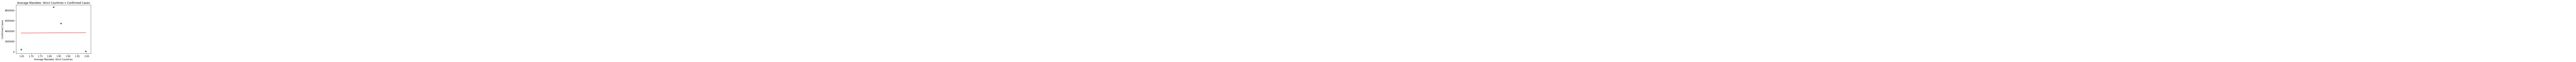

In [42]:
#linear regression strict mandates v strict cases
x_values = strict_df['Average Mandate']
y_values = strict_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [43]:
#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Confirmed Cases'])
correlation

(0.005969848828868585, 0.9940301511711314)

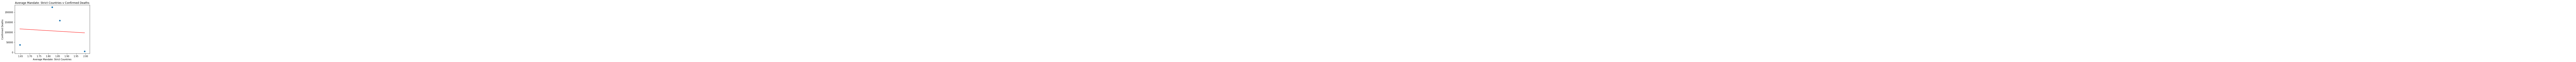

In [44]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [45]:
#pearsonr for strict mandates v strict deaths
correlation = st.pearsonr(strict_df['Average Mandate'], strict_d['Confirmed Deaths'])
correlation

(-0.07862970050620083, 0.9213702994937991)

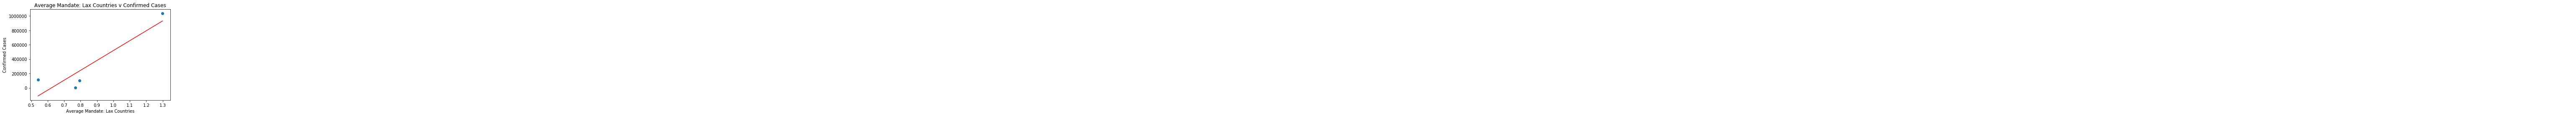

In [46]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Confirmed Cases']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases')
plt.show()

In [47]:
#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Confirmed Cases'])
correlation

(0.9100025559884284, 0.08999744401157161)

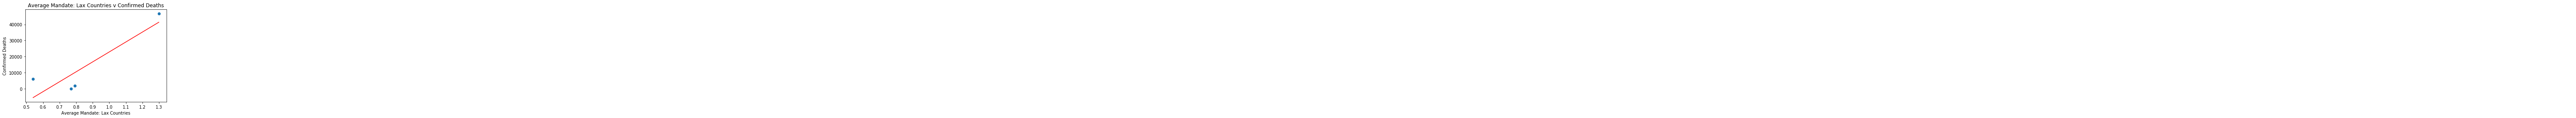

In [48]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_d['Confirmed Deaths']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')
plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths')
plt.show()

In [49]:
#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_d['Confirmed Deaths'])
correlation

(0.8920745759776135, 0.10792542402238647)

ECONOMIC SPENDING. 

In [50]:
data.head()

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
0,Brazil,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')
data.set_index('CountryName')

,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
United States,2020-10-21,3.0,2.0,2.0,2.0,0.0,4.0,8273304.0,221066.0
United States,2020-10-22,3.0,2.0,2.0,2.0,0.0,4.0,8336282.0,222201.0
United States,2020-10-23,3.0,2.0,2.0,2.0,0.0,4.0,8408340.0,223042.0


c1: 0 - no measures 1 - recommend closing 2 - require closing (only some levels or categories, eg just high school, or just public schools) 3 - require closing all levels Blank - no data c2: 0 - no measures 1 - recommend closing (or recommend work from home) 2 - require closing (or work from home) for some sectors or categories of workers 3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors) Blank - no data c6: 0 - no measures 1 - recommend not leaving house 2 - require not leaving house with exceptions for daily exercise, grocery shopping, and 'essential' trips 3 - require not leaving house with minimal exceptions (eg allowed to leave once a week, or only one person can leave at a time, etc) Blank - no data h6: 0 - No policy 1 - Recommended 2 - Required in some specified shared/public spaces outside the home with other people present, or some situations when social distancing not possible 3 - Required in all shared/public spaces outside the home with other people present or all situations when social distancing not possible 4 - Required outside the home at all times regardless of location or presence of other people

In [53]:
#last day everyone reported.  All 8 countries. 
last_report = data.loc[data['Date']=='2020-10-22']
last_report

,CountryName,Date,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
295,Brazil,2020-10-22,3.0,2.0,2.0,1.0,0.000000e+00,4.0,5298772.0,155403.0
597,China,2020-10-22,1.0,2.0,3.0,1.0,0.000000e+00,2.0,91044.0,4739.0
899,United Kingdom,2020-10-22,3.0,2.0,1.0,2.0,5.305826e+09,3.0,789229.0,44158.0
1206,Italy,2020-10-22,1.0,2.0,0.0,1.0,0.000000e+00,3.0,449648.0,36832.0
1502,Japan,2020-10-22,1.0,1.0,1.0,1.0,0.000000e+00,1.0,94524.0,1685.0
1800,New Zealand,2020-10-22,0.0,0.0,0.0,2.0,0.000000e+00,1.0,1558.0,25.0
2106,Sweden,2020-10-22,0.0,1.0,0.0,2.0,0.000000e+00,0.0,109326.0,5917.0
2406,United States,2020-10-22,3.0,2.0,2.0,2.0,0.000000e+00,4.0,8336282.0,222201.0


In [54]:
#look at descriptive statistics of all mandates on last day. 
last_report.describe()

,C1_School_closing,C2_Workplace_closing,C6_Stay_home_requirements,E1_Income_support,E3_Fiscal_measures,H6_Facial_coverings,ConfirmedCases,ConfirmedDeaths
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00,8.000000,8.000000e+00,8.000000
mean,1.500000,1.500000,1.125000,1.500000,6.632283e+08,2.250000,1.896298e+06,58870.000000
std,1.309307,0.755929,1.125992,0.534522,1.875893e+09,1.488048,3.154526e+06,83806.576334
min,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,1.558000e+03,25.000000
25%,0.750000,1.000000,0.000000,1.000000,0.000000e+00,1.000000,9.365400e+04,3975.500000
50%,1.000000,2.000000,1.000000,1.500000,0.000000e+00,2.500000,2.794870e+05,21374.500000
75%,3.000000,2.000000,2.000000,2.000000,0.000000e+00,3.250000,1.916615e+06,71969.250000
max,3.000000,2.000000,3.000000,2.000000,5.305826e+09,4.000000,8.336282e+06,222201.000000


In [55]:
#narrow down to just economic mandates and additional spending e3
df = data[['CountryName','Date','E1_Income_support','E3_Fiscal_measures','ConfirmedCases','ConfirmedDeaths']]
df.head()

,CountryName,Date,E1_Income_support,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0


In [56]:
df.set_index('CountryName')

,Date,E1_Income_support,E3_Fiscal_measures,ConfirmedCases,ConfirmedDeaths
CountryName,,,,,
Brazil,2020-01-01,0.0,0.0,0.0,0.0
Brazil,2020-01-02,0.0,0.0,0.0,0.0
Brazil,2020-01-03,0.0,0.0,0.0,0.0
Brazil,2020-01-04,0.0,0.0,0.0,0.0
Brazil,2020-01-05,0.0,0.0,0.0,0.0
...,...,...,...,...,...
United States,2020-10-21,2.0,0.0,8273304.0,221066.0
United States,2020-10-22,2.0,0.0,8336282.0,222201.0
United States,2020-10-23,2.0,0.0,8408340.0,223042.0


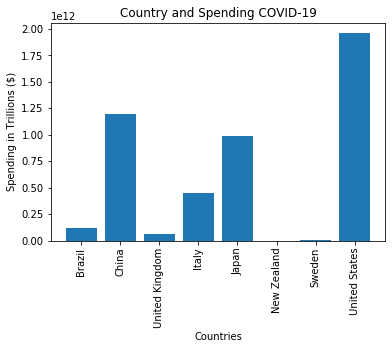

In [57]:
plt.bar(df['CountryName'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')
plt.title('Country and Spending COVID-19')
plt.xlabel('Countries')
plt.ylabel('Spending in Trillions ($)')
plt.show()

(array([737425., 737456., 737485., 737516., 737546., 737577., 737607.,
        737638., 737669., 737699., 737730.]),
 <a list of 11 Text xticklabel objects>)

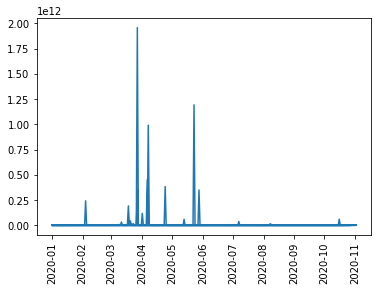

In [58]:
#graph of all countries over time and spending
plt.plot(df['Date'],df['E3_Fiscal_measures'])
plt.xticks(rotation='vertical')

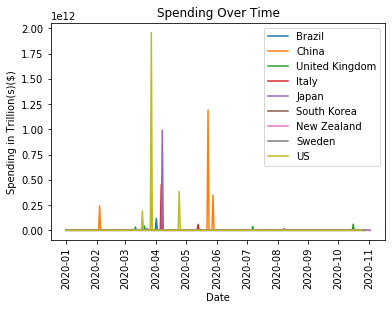

In [59]:
#figure looking at all 8 countries and amount of money spent during COVID
fig, ax = plt.subplots()

brazil = df.loc[df['CountryName']=='Brazil']
ax.plot(brazil['Date'],brazil['E3_Fiscal_measures'], label = 'Brazil')

china=df.loc[df['CountryName']=='China']
ax.plot(china['Date'],china['E3_Fiscal_measures'],label='China')

uk = df.loc[df['CountryName']=='United Kingdom']
ax.plot(uk['Date'],uk['E3_Fiscal_measures'],label='United Kingdom')

italy = df.loc[df['CountryName']=='Italy']
ax.plot(italy['Date'],italy['E3_Fiscal_measures'],label='Italy')

japan=df.loc[df['CountryName']=='Japan']
ax.plot(japan['Date'],japan['E3_Fiscal_measures'],label='Japan')

sk=df.loc[df['CountryName']=='South Korea']
ax.plot(sk['Date'],sk['E3_Fiscal_measures'],label='South Korea')

nz= df.loc[df['CountryName']=='New Zealand']
ax.plot(nz['Date'],nz['E3_Fiscal_measures'],label='New Zealand')

meatball= df.loc[df['CountryName']=='Sweden']
ax.plot(meatball['Date'],meatball['E3_Fiscal_measures'],label='Sweden')

us = df.loc[df['CountryName']=='United States']
ax.plot(us['Date'],us['E3_Fiscal_measures'],label='US')

plt.xticks(rotation='vertical')
plt.title('Spending Over Time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

In [60]:
us_spend = us['E3_Fiscal_measures'].sum()
china_spend = china['E3_Fiscal_measures'].sum()
uk_sum = uk['E3_Fiscal_measures'].sum()
italy_sum = italy['E3_Fiscal_measures'].sum()
sweden_sum = meatball['E3_Fiscal_measures'].sum()
japan_sum = japan['E3_Fiscal_measures'].sum()
nz_sum = nz['E3_Fiscal_measures'].sum()
brazil_sum = brazil['E3_Fiscal_measures'].sum()

total = {'United States':[us_spend],'China':[china_spend],'Japan':[japan_sum],'Italy':[italy_sum],'Brazil':[brazil_sum],
         'United Kingdom':[uk_sum],'Sweden':[sweden_sum],'New Zealand':[nz_sum]}


sum_df = pd.DataFrame(index=['Spent'],data = total)
sum_df.style.format('${:,.2f}')

,United States,China,Japan,Italy,Brazil,United Kingdom,Sweden,New Zealand
Spent,"$2,535,200,000,000.00","$2,136,809,000,000.00","$1,005,521,520,851.00","$542,022,172,143.20","$185,820,699,472.27","$181,278,349,255.19","$8,162,169,045.70",$0.00


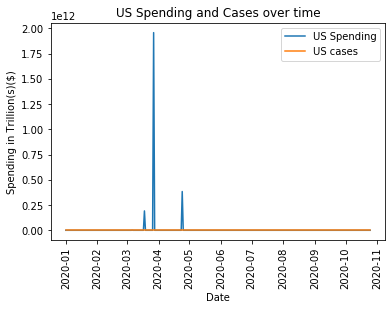

Hard to tell because of scale, but US spending is $2 trillion and cases is over 8 million


In [71]:
#US spending and cases.  Cannot tell anything because US spending is 2Trillion and cases is over 8million
plt.plot(us['Date'],us['E3_Fiscal_measures'], label='US Spending')
plt.plot(us['Date'],us['ConfirmedCases'], label='US cases')
plt.xticks(rotation='vertical')
plt.title('US Spending and Cases over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

print('Hard to tell because of scale, but US spending is $2 trillion and cases is over 8 million')

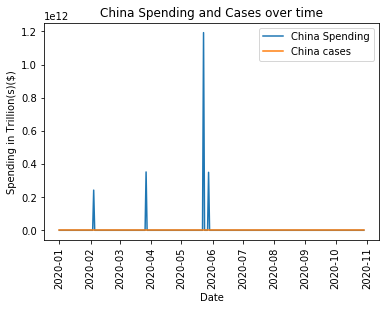

Hard to tell because of scale, but China spending is over $1 trillion and cases is over 91k


In [72]:
#China spending and cases.  Cannot tell anything because China spending is over 1Trillion and cases is over 91k
plt.plot(china['Date'],china['E3_Fiscal_measures'],label='China Spending')
plt.plot(china['Date'],china['ConfirmedCases'],label='China cases')
plt.xticks(rotation='vertical')
plt.title('China Spending and Cases over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()


print('Hard to tell because of scale, but China spending is over $1 trillion and cases is over 91k')

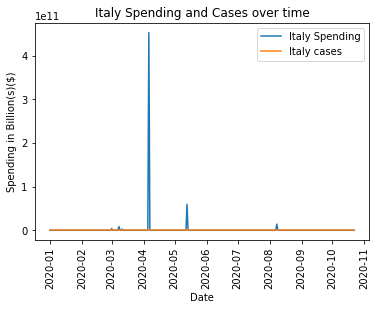

Hard to tell because of scale, but Italy spending is $4 billion and cases is over 500k


In [76]:
#italy spending and cases.  Cannot tell anything because italy spending is 4billion and cases is over 500k
plt.plot(italy['Date'],italy['E3_Fiscal_measures'],label='Italy Spending')
plt.plot(italy['Date'],italy['ConfirmedCases'],label='Italy cases')
plt.xticks(rotation='vertical')
plt.title('Italy Spending and Cases over time')
plt.xlabel('Date')
plt.ylabel('Spending in Billion(s)($)')
plt.legend()
plt.show()


print('Hard to tell because of scale, but Italy spending is $4 billion and cases is over 500k')

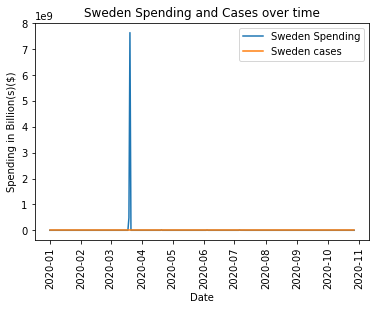

Hard to tell because of scale, but Sweden spending is $7 billion and cases is over 109k


In [81]:
#Sweden spending and cases.  Cannot tell anything because sweden spending is 7billion and cases is over 109k
plt.plot(meatball['Date'],meatball['E3_Fiscal_measures'], label='Sweden Spending')
plt.plot(meatball['Date'],meatball['ConfirmedCases'],label='Sweden cases')
plt.xticks(rotation='vertical')
plt.title('Sweden Spending and Cases over time')
plt.xlabel('Date')
plt.ylabel('Spending in Billion(s)($)')
plt.legend()
plt.show()

print('Hard to tell because of scale, but Sweden spending is $7 billion and cases is over 109k')

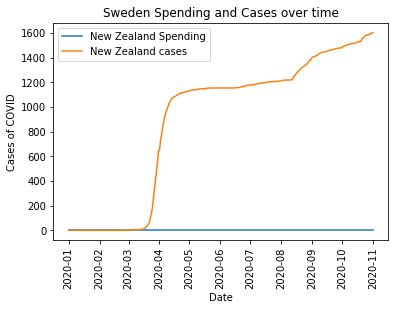

New Zealand spent $0 and cases just over 1.6k


In [82]:
#newzealand spending and cases.  NewZealand spending is 0 and cases is over 1.6k.  The country is just beginning to talk about economic impact now that COVID is none existent in the country
plt.plot(nz['Date'],nz['E3_Fiscal_measures'], label='New Zealand Spending')
plt.plot(nz['Date'],nz['ConfirmedCases'], label='New Zealand cases')
plt.xticks(rotation='vertical')
plt.title('Sweden Spending and Cases over time')
plt.xlabel('Date')
plt.ylabel('Cases of COVID')
plt.legend()
plt.show()

print('New Zealand spent $0 and cases just over 1.6k')

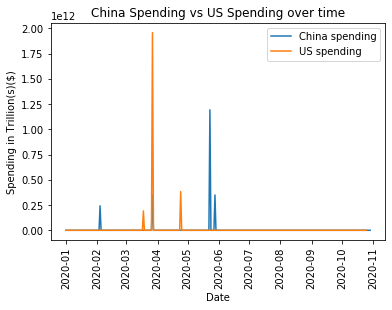

Graph is interesting because it shows China spending a little and adding more in the long run. The US in contrast spent a lot up front and not as much later.


In [88]:
#China v US economic spending
plt.plot(china['Date'],china['E3_Fiscal_measures'], label ='China spending')
plt.plot(us['Date'],us['E3_Fiscal_measures'], label = 'US spending')
plt.xticks(rotation='vertical')
plt.title('China Spending vs US Spending over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

print('Graph is interesting because it shows China spending a little and adding more in the long run. The US in contrast spent a lot up front and not as much later.')

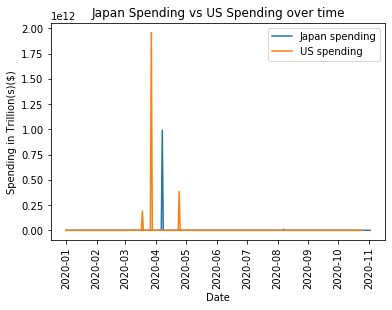

Japan is interesting because it spend a little over 20% additional of its annual GDP on fighting COVID.  While the US spent rougly 12% over its annual of GDP on COVID.


In [90]:
#japan v us economic spending
plt.plot(japan['Date'],japan['E3_Fiscal_measures'], label='Japan spending')
plt.plot(us['Date'],us['E3_Fiscal_measures'], label='US spending')
plt.xticks(rotation='vertical')
plt.title('Japan Spending vs US Spending over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

print('Japan is interesting because it spend a little over 20% additional of its annual GDP on fighting COVID.  While the US spent rougly 12% over its annual of GDP on COVID.')

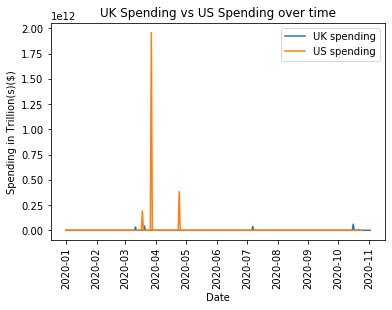

UK spending is interesting because it is very little compared to counterpart in the US. UK spent $181billion while the US spent $2.53 trillion.


In [93]:
#uk v us economic spending
plt.plot(uk['Date'],uk['E3_Fiscal_measures'],label='UK spending')
plt.plot(us['Date'],us['E3_Fiscal_measures'], label='US spending')
plt.xticks(rotation='vertical')
plt.title('UK Spending vs US Spending over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

print('UK spending is interesting because it is very little compared to counterpart in the US. UK spent $181billion while the US spent $2.53 trillion.')

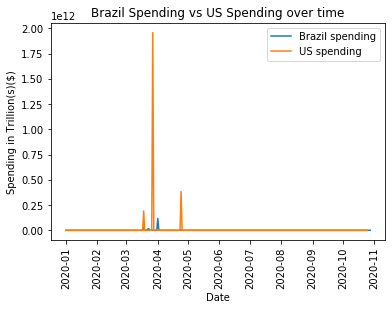

The relationship on spending between the US and Brazil is interesting because they have similar population size.  Brazil around 220 million people. The US around 330 million people. Both of these countries also had some of the most cases in the world.  The US had 8 million cases and Brazil had little over 5.5million cases.


In [95]:
#brazil v us economic spending
plt.plot(brazil['Date'],brazil['E3_Fiscal_measures'], label='Brazil spending')
plt.plot(us['Date'],us['E3_Fiscal_measures'], label='US spending')
plt.xticks(rotation='vertical')
plt.title('Brazil Spending vs US Spending over time')
plt.xlabel('Date')
plt.ylabel('Spending in Trillion(s)($)')
plt.legend()
plt.show()

print('The relationship on spending between the US and Brazil is interesting because they have similar population size.  Brazil around 220 million people. The US around 330 million people. Both of these countries also had some of the most cases in the world.  The US had 8 million cases and Brazil had little over 5.5million cases.')